<div class="alert alert-success">
Este notebook de ipython depende de los modulos:  
<li> `tecnicas_numericas`, ilustrado en el notebook [Técnicas numéricas](tecnicas_numericas.ipynb).  
<li> `vis_int`, ilustrado en el notebook [Visualización e Interacción](vis_int.ipybn) (esta incluido en el `import` a `tecnicas_numericas`).  
</div>

In [1]:
from tecnicas_numericas import *
import tecnicas_numericas
print(dir(tecnicas_numericas))

['Box', 'Button', 'E_N', 'FloatSlider', 'HTML', 'IntSlider', 'K_Schr', 'Latex', 'Markdown', 'Math', 'Phi', 'Solve_Schr', 'Text', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'agregar_control', 'biseccion', 'clear_output', 'cos', 'discretizar', 'disparo', 'display', 'estacionario', 'exp', 'fixed', 'fun_contenedor_base', 'graficar_autofuncion', 'graficar_autovalor', 'graficar_funcion', 'graficar_potencial', 'graficar_punto_texto', 'incremental', 'interact', 'interactive', 'link', 'log', 'numerov', 'pi', 'plt', 'potencial', 'presion_disparo', 'raiz_n', 'sin', 'sqrt', 'tan']


# Estados ligados

El presente documento cumple como función ilustrar de forma interactiva el comportamiento de las soluciones de la ecuación de Schrödinger estacionaria para estados ligados en problemas 1D con la aplicación del método de Numerov.

## Simulación

La aplicación del método del disparo con el algoritmo de Numerov, implica la búsqueda de raíces para encontrar los autovalores de energía. Su forma de proceder es mediante el avance regular en pasos de energía entre un mínimo y máximo hasta encontrar un cambio de signo en la evaluación la función de onda (o criterio equivalente, como la derivada logaritmica de la misma) hasta el punto de comparación. La presencia de este cambio de signo indica que existe una energía $E$ en el intervalo $[E_i, E_{i+1}]$ que es o raíz de la función de Numerov (por tanto autovalor del sistema) o una discontinuidad. Estas raíces y discontinuidas son asociadas a la función equivalente de cuantización de la energía, como en el problema típico de potencial finito lo es la ecuación trascendental (sin embargo, esta no aparace explicitamente en el modelo numerico).

### Funciones de potencial

Las soluciones de autovalores de energía de un sistema se asocian al potencial y geometría del sistema (condiciones de frontera para un problema sobre una línea por ser 1D), las cuales se deben imponer acorde a las condiciones físicas de interes. Para las condiciones de frontera sabemos que en los extremos estas deben anularse, así que solo hace falta describir el potencial al cual se esta sujeto.

__Pozo infinito y finito__

El potencial del pozo infinito es descrito como:

\begin{equation}
V(x) = \begin{cases}
0 & |x| < \frac{a}{2}\\
\infty & |x| \geq \frac{a}{2}
\end{cases}
\end{equation}

Para el potencial de un pozo finito su potencial se puede describir como:

\begin{equation}
V(x) = \begin{cases}
0 & |x| < \frac{a}{2}\\
V_0 & |x| \geq \frac{a}{2}
\end{cases}
\end{equation}

Estos pozos son los casos básicos de estudio por la facilidad para su desarrollo análitico e interpretación sencilla. Se puede ver en estos casos de estudio aplicaciones en ...  

In [2]:
def V_inf(x):
    return 0

def V_fin(V_0, a, x):
    if abs(x) < a/2:
        return 0
    else:
        return V_0

Para efectos numéricos el infinito se traslada a una longitud grande comparativamente al ancho del pozo, la cual se designará como $L$. En el caso de que $a = L$, corresponde justamente al pozo infinito, de manera que la simulación de estos dos casos requiere un solo control y es basado en el potencial finito.  

<IPython.core.display.Latex object>

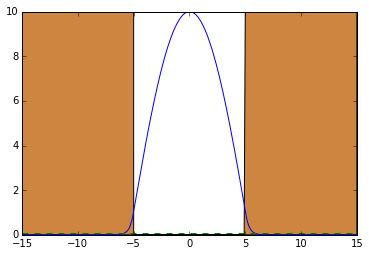

In [3]:
control_pozo = fun_contenedor_base()
agregar_control(control_pozo, FloatSlider(value = 5.2, min = .5, max= 10., step= .1, description='a'))
pozo_link = link((control_pozo.children[1], 'min'), (control_pozo.children[4], 'value'))
boton_pozo = Button(description='Simular pozo')
def click_pozo(boton):
    V_max = control_pozo.children[0].value
    L = control_pozo.children[1].value
    N = control_pozo.children[2].value
    n = control_pozo.children[3].value
    a = control_pozo.children[4].value
    Vx = lambda x: V_fin(V_max, a, x)
    Solve_Schr(Vx, V_max, L, N, n)
    clear_output(wait=True)

boton_pozo.on_click(click_pozo)
display(control_pozo, boton_pozo)

__Potencial armonico__  
El potencial armonico cumple con la descripción dada por
\begin{equation}
V(x) = \frac{\omega^2 x^2}{4}
\end{equation}

In [4]:
def V_arm(omega, x):
    return omega**2 * x**2 / 4

<IPython.core.display.Latex object>

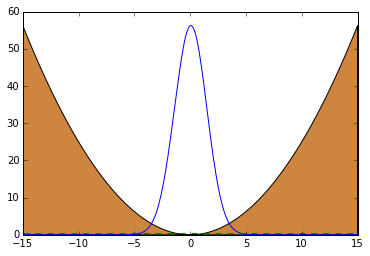

In [5]:
control_arm = fun_contenedor_base()
agregar_control(control_arm, FloatSlider(value = 1., min = .1, max= 4., step= .1, description='$\omega$'))
boton_arm = Button(description='Simular potencial')
def click_arm(boton):
    E_max = control_arm.children[0].value
    L = control_arm.children[1].value
    N = control_arm.children[2].value
    n = control_arm.children[3].value
    omega = control_arm.children[4].value
    Vx = lambda x: V_arm(omega, x)
    Solve_Schr(Vx, E_max, L, N, n)
    clear_output(wait=True)

boton_arm.on_click(click_arm)
display(control_arm, boton_arm)

__Potencial arbitrario__  
El problema 1D puede ser resuelto para un problema de potencial arbitrario $V(x)$, donde `str_potencial` es un _string_ que representa la función del potencial. Debe tenerse en cuenta, tanto para este caso como los anteriores, que numéricamente el infinito es representado como una escala mayor por un cierta cantidad que la escala de interes del sistema.  

_Actividad_ : Proponga una función potencial de interes y desarrolle el bloque de código requerido para simularlo con este notebook. Use como base las funciones desarrolladas en los notebooks y el bloque siguiente.  

El bloque siguiente ilustra un problema de potencial armonico con anarmonicidad.

<IPython.core.display.Latex object>

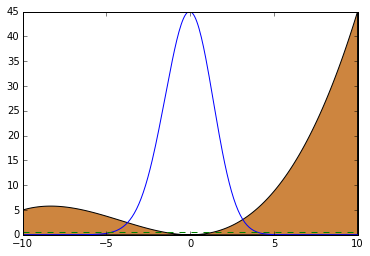

In [6]:
control_arb = fun_contenedor_base()
E_max = control_arb.children[0]
L = control_arb.children[1]
N = control_arb.children[2]
n = control_arb.children[3]
n.value = 300
L.value = 20.

str_potencial = Text(value='x**2 / 4 + x**3 / 50', description= 'Potencial')
str_potencial.funcion = lambda x: eval(str_potencial.value)
agregar_control(control_arb, str_potencial)
# Ingrese un texto en formato python con dependencia solo de 'x'.

def ingreso_potencial(str_potencial):
    str_potencial.funcion = lambda x: eval(str_potencial.value)
    Vx = str_potencial.funcion
    h = L.value / n.value
    V_vec = [Vx(-L.value/2 + h*i) for i in range(n.value + 1)]
    V_min = min(V_vec)
    V_max = max(V_vec)
    dV = (V_max - V_min) / 50
    E_max.step = dV
    E_max.min = V_min
    E_max.max = V_max + (V_max - V_min)
    E_max.value = V_max

ingreso_potencial(str_potencial)
boton_arb = Button(description='Simular potencial')
    
def click_arbitrario(boton):
    Vx = str_potencial.funcion
    Solve_Schr(Vx, E_max.value, L.value, N.value, n.value)
    clear_output(wait=True)

str_potencial.on_submit(ingreso_potencial)
boton_arb.on_click(click_arbitrario)
display(control_arb, boton_arb)

Para potenciales no simétricos y con amplias diferencias entre el potencial máximo y mínimo se recomienda usar instancias directas de python e ipython, debido al comportamiento como servidor de las instancias de Jupyter, que provocan la terminación del llamado al kernel tras un \textit{timeout}, de aproximadamente minuto y medio. Tras este periodo se recomienda reiniciar el kernel (tanto si es de ejecución local como en linea).  

El caso con los siguientes parámetros toma 256s su solución y no es posible realizarlo en el notebook.  
+ $L = 20$
+ $N=1$
+ $n=300$
+ $V(x) = \frac{x^2}{4} + 0.3 x^3$
+ $E_{max} = 325$

Se encuentra $E_1 = -241.0251$ y la función de onda graficada a continuación.  

![Función de onda solución](x2_4p03x3.png "Función de onda solución al potencial $\frac{x^2}{4} + 0.3 x^3$")